In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.linear_model import LinearRegression
import scipy
import os
from os.path import join
import pandas as pd

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

c:\Users\aless\OneDrive\Desktop\BRENDA


## Script to obtain the results of the fitted gradient boosting models

### Plot performance of different models

Pearson r

In [18]:
models = ["kegg", "inchis", "pubchem", "meta", "sabio"] #rdkit = InChIs
model_names = {"kegg": "BioServices", # kegg to smile
               "inchis": "RDKit", #kegg to inchi to smile
               "pubchem": "PubChem", #cid to smile
               "meta": "MetaboAnalyst",
               "sabio": "SABIO-RK \n + PubChem"}

*Xgboost is trained in HPC and results are copied inside the training_results directory*

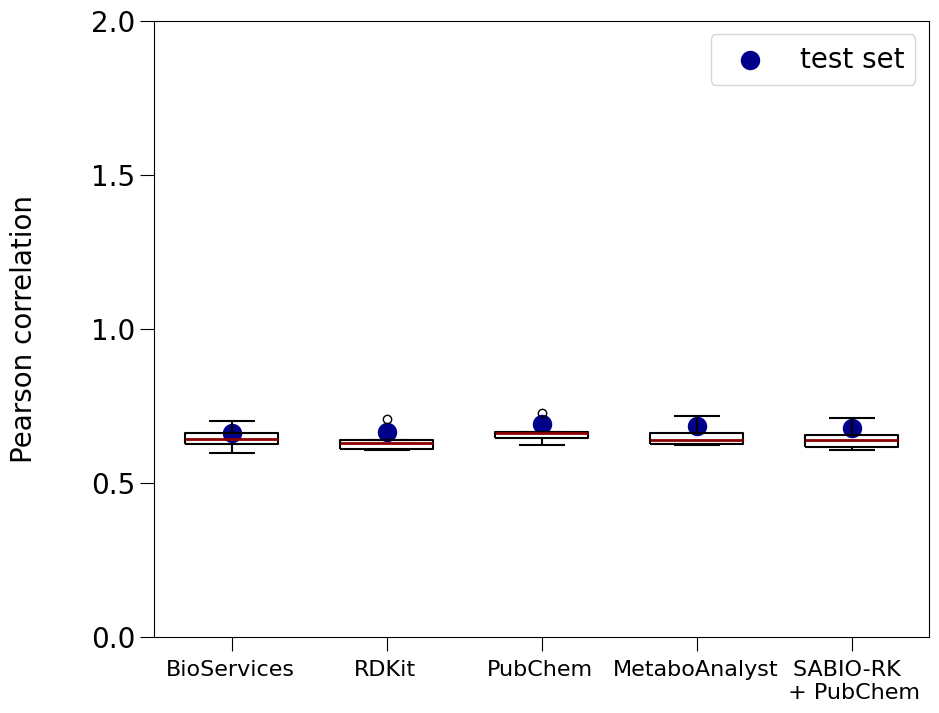

In [37]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 20})
plt.ylim(0.0, 2)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results_smiles", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results_smiles", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results_smiles", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results_smiles", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results_smiles", "y_test_true_xgboost_" + model + ".npy"))
    Pearson_test = stats.pearsonr(test_y, pred_y)[0]
    
    if i == 0:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(Pearson_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})


ax.locator_params(axis="y", nbins=4)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 16)
ax.tick_params(axis='x', which="minor",length=0)


plt.ylabel("Pearson correlation")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.savefig(join("figures", "boxplots_pearson_r.png"))
plt.show()


In [20]:
import os
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

model_pearson = {}

for model in models:
    path = os.path.join("training_results_smiles", f"Pearson_CV_xgboost_{model}.csv")
    data = pd.read_csv(path, header=0)  
    scores = data.iloc[:, 0].values
    model_pearson[model] = scores


In [21]:
model_pearson

{'kegg': array([0.66071242, 0.59650945, 0.62538186, 0.64035147, 0.70041023]),
 'inchis': array([0.62955919, 0.61040972, 0.60462665, 0.63883304, 0.70712266]),
 'pubchem': array([0.65992359, 0.62071992, 0.64476542, 0.66570851, 0.72598466]),
 'meta': array([0.6620775 , 0.62168364, 0.62460157, 0.63787526, 0.7169648 ]),
 'sabio': array([0.63913147, 0.60532067, 0.61616616, 0.65364597, 0.70811488])}

Mean Squared Error

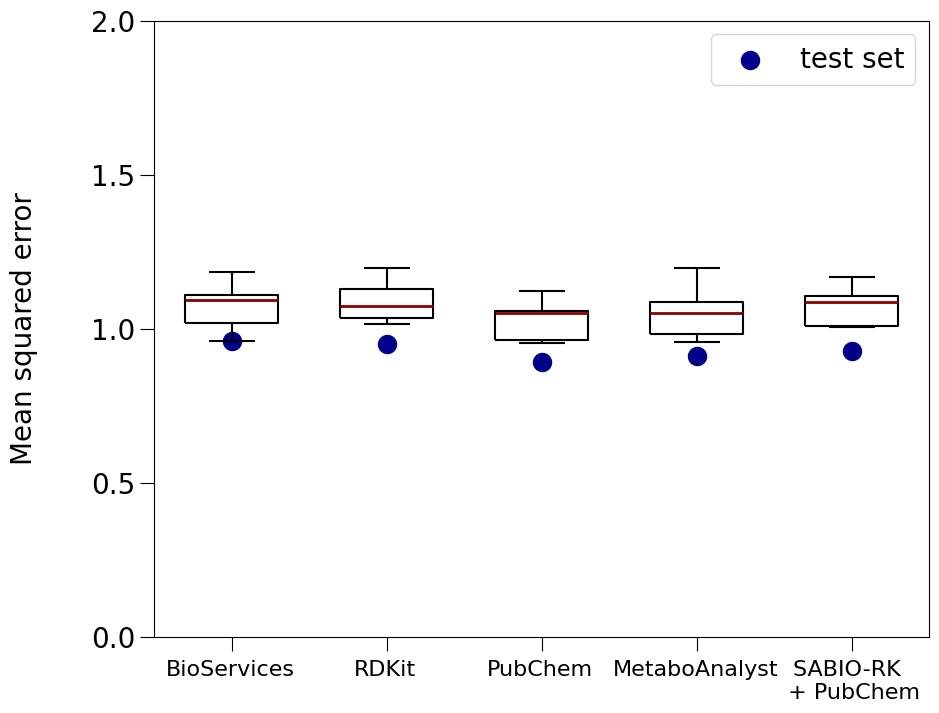

In [42]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 20})
plt.ylim(0.0, 2)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join( "training_results_smiles", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join( "training_results_smiles", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join( "training_results_smiles", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join( "training_results_smiles", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results_smiles", "y_test_true_xgboost_" + model + ".npy"))
    MSE_test = np.mean(abs(test_y -  pred_y)**2)

    
    if i == 0:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(MSE_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})



ax.locator_params(axis="y", nbins=4)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)

ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 16)
ax.tick_params(axis="x", which="minor",length=0)

plt.ylabel("Mean squared error")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.show()

In [23]:
model_mse_cv = {}

for model in models:
    path = os.path.join("training_results_smiles", f"MSE_CV_xgboost_{model}.csv")
    data = pd.read_csv(path, header=0)  
    scores = data.iloc[:, 0].values
    model_mse_cv[model] = scores

In [24]:
model_mse_cv

{'kegg': array([0.96087293, 1.1090317 , 1.09124542, 1.18286421, 1.01705974]),
 'inchis': array([1.0336974 , 1.0726251 , 1.12856478, 1.19683025, 1.01542907]),
 'pubchem': array([0.96355805, 1.05653426, 1.04919167, 1.12245951, 0.95402965]),
 'meta': array([0.95702859, 1.05060404, 1.08686416, 1.19566519, 0.98359244]),
 'sabio': array([1.00640713, 1.08677729, 1.10499217, 1.16642084, 1.00702162])}

Coefficients of determination

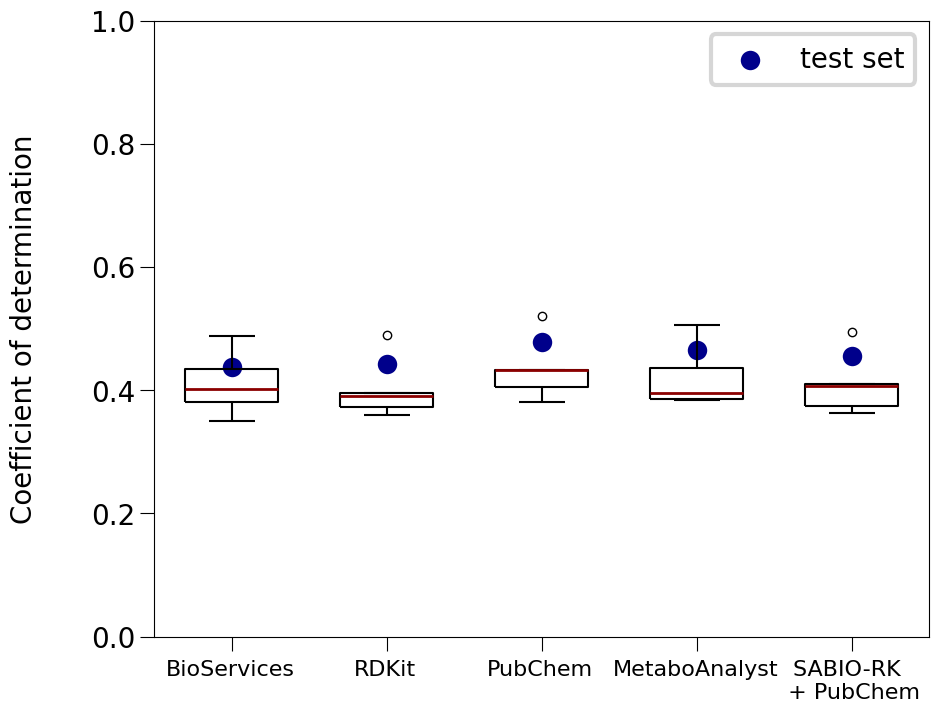

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({"font.size": 20})
plt.ylim(0, 1)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results_smiles", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results_smiles", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results_smiles", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results_smiles", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results_smiles", "y_test_true_xgboost_" + model + ".npy"))
    R2_test = r2_score(test_y, pred_y)

    if i == 0:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8, label="test set")
    else:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8)

    Boxplots.append(R2_CV)
    ticks.append(i+1)

plt.boxplot(Boxplots, positions=ticks, widths=0.6,
           medianprops={"linewidth": 2, "solid_capstyle": "butt", "c": "darkred"},
           boxprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops={"linewidth": 1.5, "solid_capstyle": "butt"})

ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])  
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks) - 0.01)


ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y=-0.03, fontsize= 16)  
ax.tick_params(axis="x", which="minor", length=0)
ax.locator_params(axis="y", nbins=5)

plt.ylabel("Coefficient of determination")
ax.yaxis.set_label_coords(-0.15, 0.5)

leg = plt.legend(loc = "upper right")
leg.get_frame().set_linewidth(3.0)
plt.savefig(join("figures", "boxplots_R2.png"))
plt.show()



In [26]:
model_r2_cv = {}

for model in models:
    path = os.path.join("training_results_smiles", f"R2_CV_xgboost_{model}.csv")
    data = pd.read_csv(path, header=0)  
    scores = data.iloc[:, 0].values
    model_r2_cv[model] = scores

In [27]:
model_r2_cv

{'kegg': array([0.43411253, 0.35076692, 0.38142096, 0.40197426, 0.4887195 ]),
 'inchis': array([0.39122397, 0.37207954, 0.36026626, 0.39491338, 0.48953925]),
 'pubchem': array([0.43253119, 0.3814992 , 0.40525939, 0.43251332, 0.52040501]),
 'meta': array([0.43637658, 0.38497078, 0.38390451, 0.39550241, 0.50554367]),
 'sabio': array([0.40729605, 0.36379477, 0.37362854, 0.4102876 , 0.49376571])}

In [28]:
df_metrics = pd.DataFrame()

for model in model_r2_cv.keys():
    for i in range(5):  
        df_metrics = pd.concat([df_metrics, pd.DataFrame({
            'Model': [model],
            'Fold': [i + 1],
            'R2': [model_r2_cv[model][i]],
            'MSE': [model_mse_cv[model][i]],
            'Pearson': [model_pearson[model][i]]
        })], ignore_index=True)

df_metrics


,Model,Fold,R2,MSE,Pearson
0,kegg,1,0.434113,0.960873,0.660712
1,kegg,2,0.350767,1.109032,0.596509
2,kegg,3,0.381421,1.091245,0.625382
3,kegg,4,0.401974,1.182864,0.640351
4,kegg,5,0.488720,1.017060,0.700410
5,inchis,1,0.391224,1.033697,0.629559
6,inchis,2,0.372080,1.072625,0.610410
7,inchis,3,0.360266,1.128565,0.604627
8,inchis,4,0.394913,1.196830,0.638833
9,inchis,5,0.489539,1.015429,0.707123


In [29]:
df_metrics.to_csv("df_metrics.csv")

In [ ]:

from scipy.stats import wilcoxon
import itertools
df = df_metrics.copy()

models = df['Model'].unique()

mse_dict = {}
for model in models:
    mse_dict[model] = df[df['Model'] == model].sort_values('Fold')['MSE'].values

# Pairwise Wilcoxon signed-rank test
results = []
for m1, m2 in itertools.combinations(models, 2):
    stat, p = wilcoxon(mse_dict[m1], mse_dict[m2], alternative='two-sided') # m1 is better or worse than m2
    results.append((m1, m2, stat, p))

for m1, m2, stat, p in results:
    print(f"Wilcoxon test between {m1} and {m2}: statistic={stat:.3f}, p-value={p:.4f}")



Wilcoxon test between kegg and inchis: statistic=4.000, p-value=0.4375
Wilcoxon test between kegg and pubchem: statistic=1.000, p-value=0.1250
Wilcoxon test between kegg and meta: statistic=3.000, p-value=0.3125
Wilcoxon test between kegg and sabio: statistic=7.000, p-value=1.0000
Wilcoxon test between inchis and pubchem: statistic=0.000, p-value=0.0625
Wilcoxon test between inchis and meta: statistic=0.000, p-value=0.0625
Wilcoxon test between inchis and sabio: statistic=2.000, p-value=0.1875
Wilcoxon test between pubchem and meta: statistic=3.000, p-value=0.3125
Wilcoxon test between pubchem and sabio: statistic=0.000, p-value=0.0625
Wilcoxon test between meta and sabio: statistic=3.000, p-value=0.3125


Statistical tests

In [31]:
models

['kegg', 'inchis', 'pubchem', 'meta', 'sabio']

In [43]:
pred_y = np.load(join("training_results_smiles", "y_test_pred_xgboost_" + models[0] + ".npy"))
test_y = np.load(join("training_results_smiles", "y_test_true_xgboost_" + models[0] + ".npy"))
errors_kegg = abs(pred_y-test_y)

pred_y = np.load(join("training_results_smiles", "y_test_pred_xgboost_" + models[1] + ".npy"))
test_y = np.load(join("training_results_smiles", "y_test_true_xgboost_" + models[1] + ".npy"))
errors_inchis = abs(pred_y-test_y)

pred_y = np.load(join("training_results_smiles", "y_test_pred_xgboost_" + models[2] + ".npy"))
test_y = np.load(join("training_results_smiles", "y_test_true_xgboost_" + models[2] + ".npy"))
errors_pubchem = abs(pred_y-test_y)

pred_y = np.load(join("training_results_smiles", "y_test_pred_xgboost_" + models[3] + ".npy"))
test_y = np.load(join("training_results_smiles", "y_test_true_xgboost_" + models[3] + ".npy"))
errors_meta = abs(pred_y-test_y)

pred_y = np.load(join("training_results_smiles", "y_test_pred_xgboost_" + models[4] + ".npy"))
test_y = np.load(join("training_results_smiles", "y_test_true_xgboost_" + models[4] + ".npy"))
errors_sabio = abs(pred_y-test_y)


In [44]:
d = errors_pubchem - errors_kegg
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with pubchem and kegg", p)

d = errors_pubchem - errors_inchis
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with pubchem and inchis", p) 

d = errors_pubchem - errors_meta
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with pubchem and meta", p)

d = errors_pubchem - errors_sabio
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with pubchem and sabio", p)

Difference between predictions with pubchem and kegg 0.03539573895777078
Difference between predictions with pubchem and inchis 0.4764293017405039
Difference between predictions with pubchem and meta 0.07922435337365258
Difference between predictions with pubchem and sabio 0.014347837375045483


In [41]:
errors = {}
for model in models:
    pred_y = np.load(join("training_results_smiles", f"y_test_pred_xgboost_{model}.npy"))
    test_y = np.load(join("training_results_smiles", f"y_test_true_xgboost_{model}.npy"))
    errors[model] = abs(pred_y - test_y)

pubchem_errors = errors['pubchem']

for model, err in errors.items():
    if model != 'pubchem':
        d = pubchem_errors - err
        w, p = wilcoxon(d, alternative='less')
        print(f"Wilcoxon test: pubchem vs {model}, p = {p:.4f}")


Wilcoxon test: pubchem vs kegg, p = 0.0354
Wilcoxon test: pubchem vs inchis, p = 0.4764
Wilcoxon test: pubchem vs meta, p = 0.0792
Wilcoxon test: pubchem vs sabio, p = 0.0143


### Plotting predictions versus experimental values

Loading predictions for the best model (ESM1b_rxnfp)

In [29]:
model = "pubchem"

pred_y = np.load(join("training_results_smiles", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("training_results_smiles", "y_test_true_xgboost_" + model + ".npy"))

data_test = pd.read_pickle("test_df.pkl")

data_test["n_values"] = data_test["log_km"].apply(lambda x: len(x) if isinstance(x, (list, np.ndarray)) else [x])
n_values = np.array(data_test["n_values"])

In [30]:
np.mean(abs(pred_y-test_y)), 10**np.mean(abs(pred_y-test_y))

(np.float64(0.7210161251462215), np.float64(5.260367975225976))

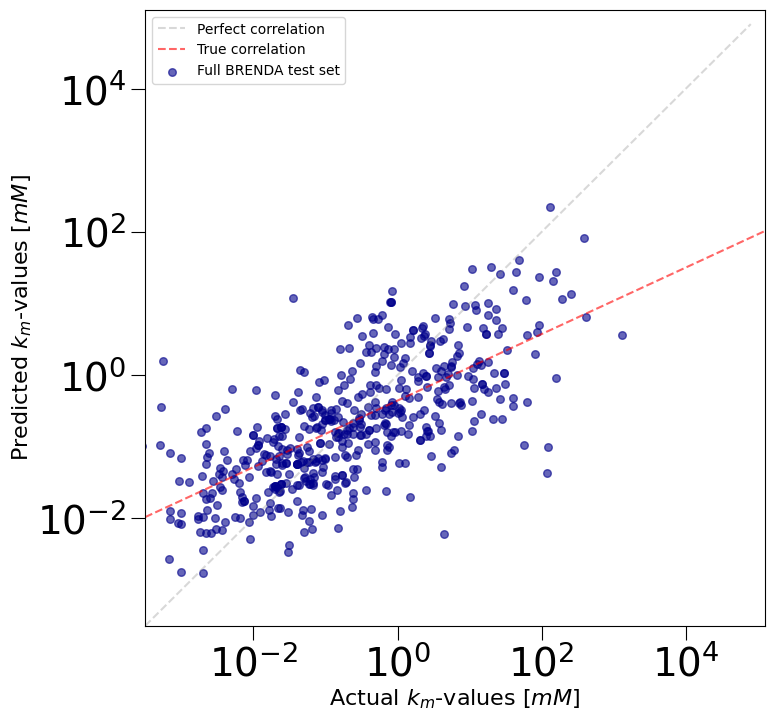

In [31]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({"font.size": 10})


plt.ylim(ymax = 5.1, ymin = -3.5)
plt.xlim(xmax = 5.1, xmin = -3.5)

ax.tick_params(axis="x", length=10)
ax.tick_params(axis="y", length=10)


ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])
plt.yticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])


reg = LinearRegression().fit(test_y.reshape(-1,1), pred_y.reshape(-1,1),)
reg.score(test_y.reshape(-1,1), pred_y.reshape(-1,1))
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]
plt.plot([-3.5,4.9], [-3.5,4.9], color='grey', alpha = 0.3, linestyle='dashed', label='Perfect correlation')
plt.plot([-3.5,5.1], [beta0 + -3.5*beta1, beta0 + 5.1*beta1], color='red', alpha = 0.6, linestyle='dashed', label='True correlation')

plt.ylabel("Predicted $k_{m}$-values [$mM$]", fontsize = 16)
plt.xlabel("Actual $k_{m}$-values [$mM$]", fontsize = 16)

plt.scatter(test_y, pred_y, alpha = 0.6, s=30, c="darkblue", label="Full BRENDA test set")

plt.savefig(join("figures", "scatter_plot.png"))

leg = plt.legend(loc = "upper left", prop={'size': 10})
plt.grid(False)
plt.savefig(join("figures", "predvsactual.png"))
plt.show()